In [133]:
import os

import numpy as np

from matplotlib import pyplot as plt

from scipy import optimize

%matplotlib inline

In [134]:
data = np.loadtxt(os.path.join('data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [135]:
def plotData(X, y):
    pos = y == 1
    neg = y == 0

    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    

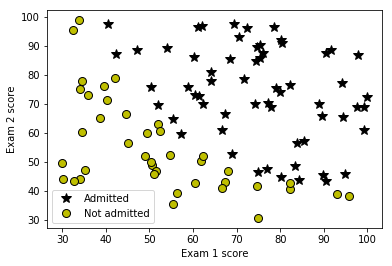

In [136]:
plotData(X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])


In [137]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    
    return g

In [138]:
sigmoid(0)

0.5

In [139]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [140]:
def costFunction(theta, X, y):
    m = y.size 
    
    hypothesis = sigmoid(np.dot(X, theta))
    error = (y * np.log(hypothesis) + ((1-y)*np.log(1-hypothesis)))
    
    J = - 1 / m * np.sum(error)

    grad = 1/m * np.dot(X.T, (hypothesis - y))

    return J, grad

In [141]:
initial_theta = np.zeros(n + 1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))

print('Expected gradients (approx): \n\y[-0.1000, -12.0092, -11.2628]\n')

test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx): 
\y[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [142]:
options = {'maxiter': 400}
res = optimize.minimize(costFunction,
                       initial_theta,
                       (X, y),
                       jac=True,
                       method='TNC',
                       options=options)
cost = res.fun
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')


Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


In [143]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.
    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.
    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.
    degree: int, optional
        The polynomial degree.
    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)    

In [144]:
def plotDecisionBoundary(plotData, theta, X, y):
    theta = np.array(theta)
    
    plotData(X[:, 1:3], y)
    if X.shape[1] <= 3:
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

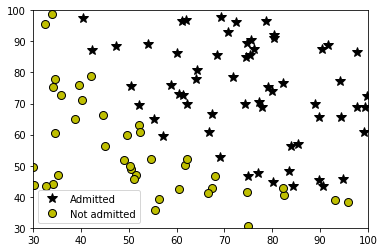

In [145]:
plotDecisionBoundary(plotData, theta, X, y)

In [146]:
def predict(theta, X):
    pred = [sigmoid(np.dot(X, theta)) >= 0.5]
    return pred

In [149]:
prob = sigmoid(np.dot([1, 90, 65], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.998
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


In [153]:
# Regularized Logistic Regression

data = np.loadtxt(os.path.join('data', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]


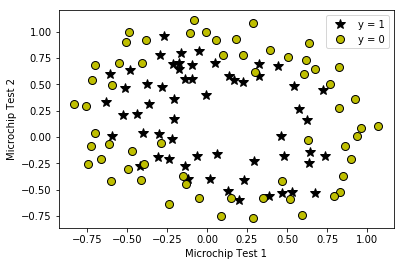

In [154]:
plotData(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0'], loc='upper right')
pass

In [155]:
X = mapFeature(X[:, 0], X[:, 1])

In [184]:
def costFunctionReg(theta, X, y, lambda_):
    m = len(y)
    hypothesis = sigmoid(np.dot(X, theta))
    error = (y * np.log(hypothesis) + ((1-y)*np.log(1-hypothesis)))
    J = -(1/m) * np.sum(error)
    reg = (lambda_/(2 * m)) * sum((theta[1:] ** 2))
    J = J + reg

    grad = np.zeros([m, 1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y )
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]
    return J, grad

In [186]:
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')


Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



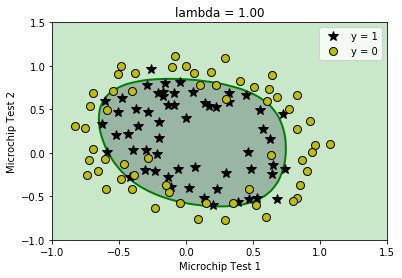

In [204]:

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

plotDecisionBoundary(plotData, theta, X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')